In [2]:
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-dark')

In [4]:
data = []
for i in range(1, 13):
    with open('./DDPG_valid_{}.json'.format(i)) as f:
        data.append(json.load(f))

In [5]:
data[0].keys()

dict_keys(['avg', 'sum', 'ep', 'val_avg', 'val_sum', 'val_ep'])

In [6]:
# avg - keyed, each magazine average reward history per run
# sum - keyed, each magazine total reward history per run

# ep - not keyed, history of average and sum of daily rewards for each run

# val - same for validation

In [7]:
import matplotlib.pyplot as plt

In [8]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

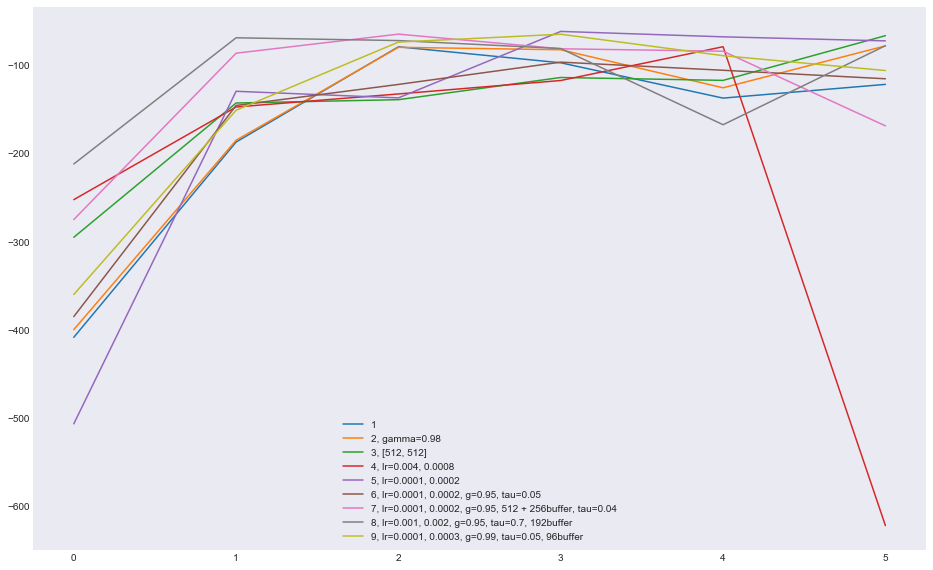

In [9]:
plt.figure(figsize=(16,10))
plt.plot([np.sum(iteration['avg']) for iteration in data[0]['ep']], label='1');
plt.plot([np.sum(iteration['avg']) for iteration in data[1]['ep']], label='2, gamma=0.98');
plt.plot([np.sum(iteration['avg']) for iteration in data[2]['ep']], label='3, [512, 512]');
plt.plot([np.sum(iteration['avg']) for iteration in data[3]['ep']], label='4, lr=0.004, 0.0008');
plt.plot([np.sum(iteration['avg']) for iteration in data[4]['ep']], label='5, lr=0.0001, 0.0002');
plt.plot([np.sum(iteration['avg']) for iteration in data[5]['ep']], label='6, lr=0.0001, 0.0002, g=0.95, tau=0.05');
plt.plot([np.sum(iteration['avg']) for iteration in data[6]['ep']], label='7, lr=0.0001, 0.0002, g=0.95, 512 + 256buffer, tau=0.04');
plt.plot([np.sum(iteration['avg']) for iteration in data[7]['ep']], label='8, lr=0.001, 0.002, g=0.95, tau=0.7, 192buffer');
plt.plot([np.sum(iteration['avg']) for iteration in data[8]['ep']], label='9, lr=0.0001, 0.0003, g=0.99, tau=0.05, 96buffer');
plt.legend();

In [10]:
c_lr = [0.0004,  0.0004,  0.0004,  0.004,  0.0002, 0.0002, 0.0002, 0.002, 0.0003, 0.0003, 0.0003, 0.0003]
a_lr = [0.00008, 0.00008, 0.00008, 0.0008, 0.0001, 0.0001, 0.0001, 0.001, 0.0001, 0.0001, 0.0001, 0.0001]

gamma = [0.92,   0.98,    0.92,    0.92,   0.92,   0.95,   0.95,   0.97,  0.99,   0.99,   0.98,   0.98]
tau =   [0.004,  0.004,   0.004,   0.004,  0.004,  0.05,   0.04,   0.7,   0.008,  0.01,   0.002,  0.002]

buffer = [128,   128,     128,     128,    128,    128,    256,    192,   96,     96,     128,    128]
layers = [256,   256,     512,     256,    256,    256,    512,    256,   384,    384,    384,    512]
l2 =     [0,     0,       0,       0,      0,      0,      0,      0,     0,      0.01,   0.000001, 0]

In [11]:
X = np.array([c_lr, a_lr, gamma, tau, buffer, layers, l2]).T

In [12]:
Y = [np.mean([np.sum(ep['avg']) for ep in d['val_ep']]) for d in data]

In [13]:
train = list(np.round([np.mean([np.sum(ep['avg']) for ep in d['ep']]) for d in data], 2))
test = list(np.round(Y,2))

In [15]:
np.array([train, test]).T # train, test

array([[ -171.71,  -206.03],
       [ -158.31,  -228.03],
       [ -145.61,  -151.45],
       [ -225.07, -1313.31],
       [ -162.37,  -174.51],
       [ -161.53,  -184.54],
       [ -126.54,  -642.48],
       [ -113.02,  -132.78],
       [ -140.63,  -145.93],
       [ -438.73,  -662.3 ],
       [ -199.16,  -273.17],
       [ -271.69,  -369.24]])

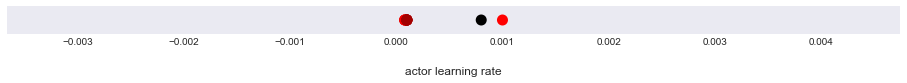

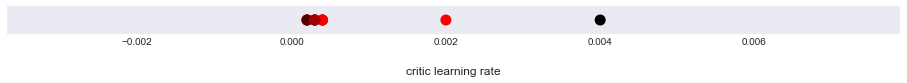

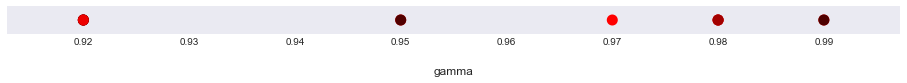

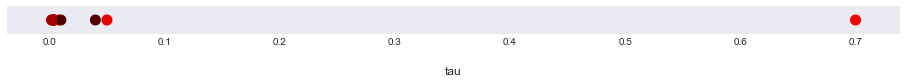

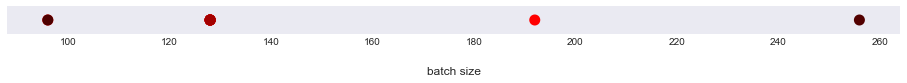

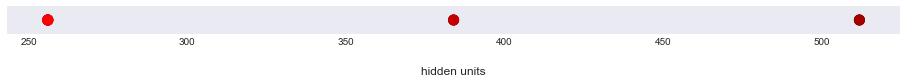

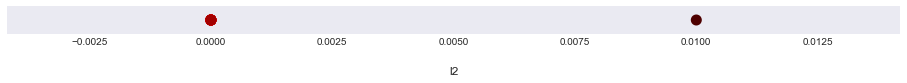

In [16]:
# test performance
def print_param(x, name: str):
    scores = ((test - np.min(test))/np.ptp(test)) ** 2
    colors = np.array([scores, np.zeros_like(scores), np.zeros_like(scores), np.ones_like(scores)]).T
    
    plt.figure(figsize=(16,0.5)); plt.yticks([]); plt.title(name, y=-1.7); #plt.xlim([0, max(x)*1.1])
    plt.scatter(x, np.zeros_like(x), c=colors, linewidths=5, marker='o', norm=True);
    
print_param(a_lr, 'actor learning rate')
print_param(c_lr, 'critic learning rate')
print_param(gamma, 'gamma')
print_param(tau, 'tau')
print_param(buffer, 'batch size')
print_param(layers, 'hidden units')
print_param(l2, 'l2')

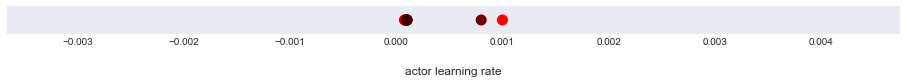

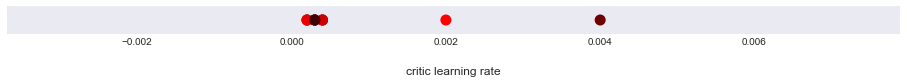

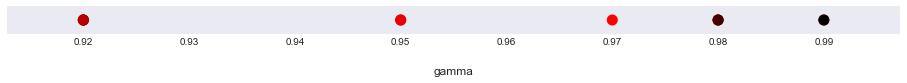

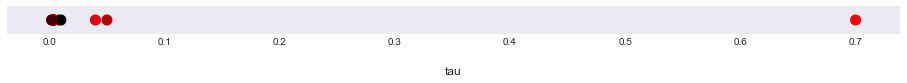

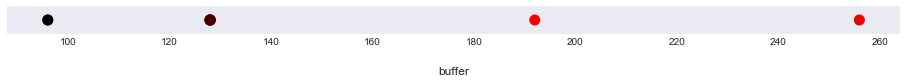

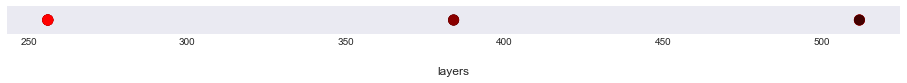

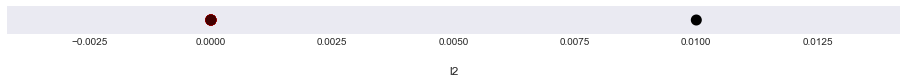

In [17]:
# train performance
def print_param(x, name: str):
    scores = ((train - np.min(train))/np.ptp(train)) ** 2
    colors = np.array([scores, np.zeros_like(scores), np.zeros_like(scores), np.ones_like(scores)]).T
    
    plt.figure(figsize=(16,0.5)); plt.yticks([]); plt.title(name, y=-1.7); #plt.xlim([0, max(x)*1.1])
    plt.scatter(x, np.zeros_like(x), c=colors, linewidths=5, marker='o', norm=True);
    
print_param(a_lr, 'actor learning rate')
print_param(c_lr, 'critic learning rate')
print_param(gamma, 'gamma')
print_param(tau, 'tau')
print_param(buffer, 'buffer')
print_param(layers, 'layers')
print_param(l2, 'l2')

In [18]:
plt.style.use('seaborn-pastel')

In [19]:
def plot_graph(i):
    plt.figure(figsize=(8,4)); plt.title(str(i+1))
    v_m = np.array(list(data[i]['avg'].values())).mean(axis=0)
    std = np.array(list(data[i]['avg'].values())).std(axis=0)
    plt.axhline(y=0., color='orange', linestyle='--')
    plt.errorbar(np.arange(6), v_m, std, linestyle='-', marker='o', capsize=4, fmt='.k', ecolor='gray', elinewidth=3);

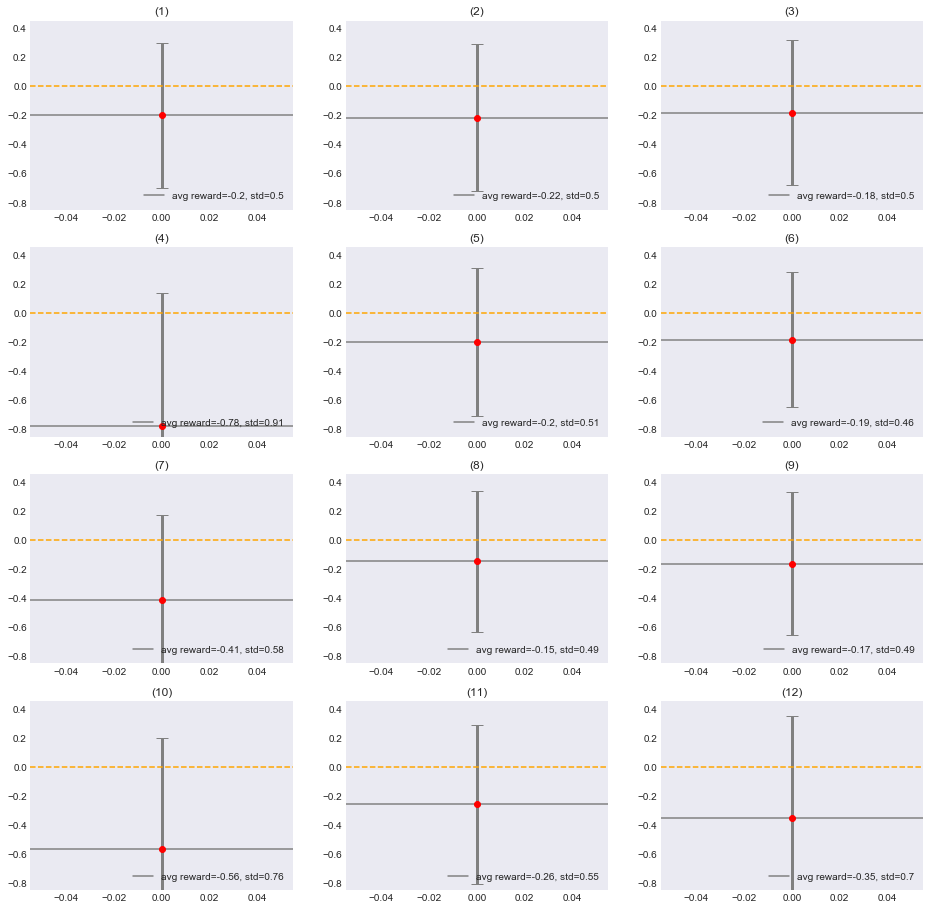

In [21]:
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 4
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    
    plt.title('({})'.format(i))
    plt.ylim([-0.85, 0.45])
    v_m = np.array(list(data[i-1]['val_avg'].values())).mean(axis=0)
    std = np.array(list(data[i-1]['val_avg'].values())).std(axis=0)
    plt.axhline(y=0., color='orange', linestyle='--')
    plt.axhline(y=v_m, color='gray', linestyle='-', label='avg reward={}, std={}'.format(np.round(v_m,2)[0], np.round(std,2)[0]));
    plt.errorbar(np.arange(1), v_m, std, linestyle='-', marker='o', capsize=6, c='red', ecolor='gray', elinewidth=3, linewidth=3);
    plt.legend(loc='lower right')

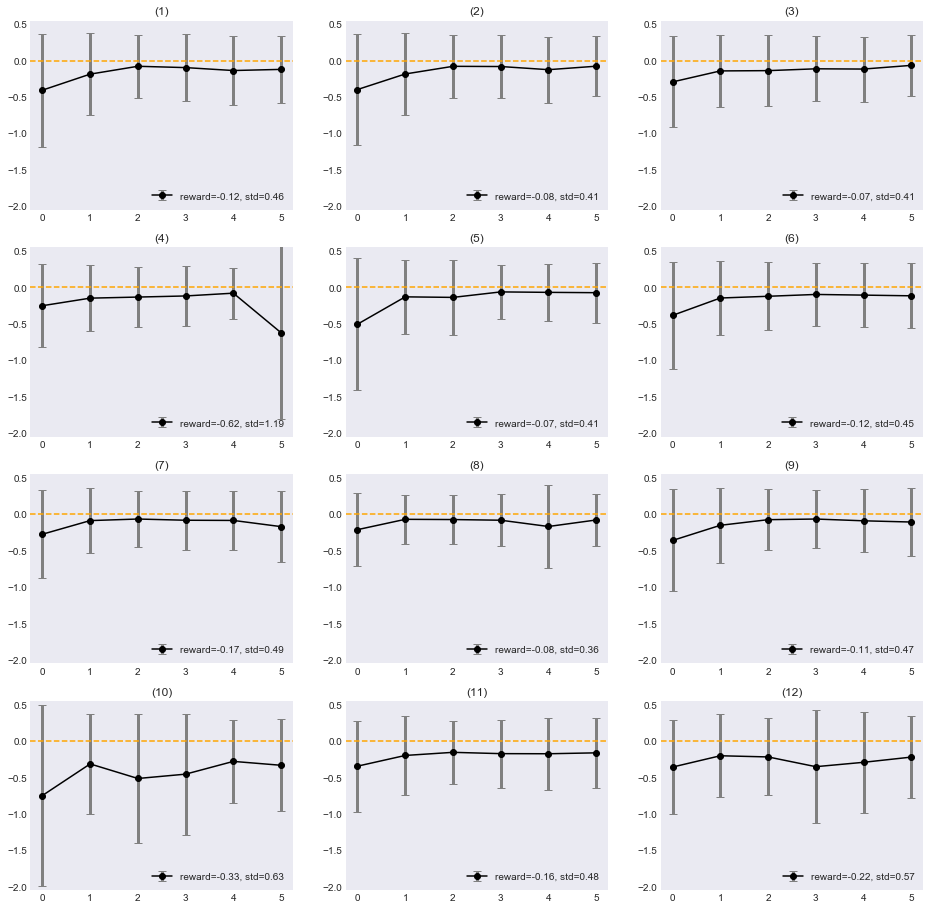

In [22]:
fig=plt.figure(figsize=(16, 16))
columns = 3
rows = 4
for i in range(1, columns*rows +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    
    plt.title('({})'.format(i))
    plt.ylim([-2.05, 0.55])
    v_m = np.array(list(data[i-1]['avg'].values())).mean(axis=0)
    std = np.array(list(data[i-1]['avg'].values())).std(axis=0)
    plt.axhline(y=0., color='orange', linestyle='--')
    plt.errorbar(np.arange(6), v_m, std, linestyle='-', marker='o', capsize=4, fmt='.k', ecolor='gray', elinewidth=3,
                label='reward={}, std={}'.format(np.round(v_m[-1],2), np.round(std[-1],2)));
    plt.legend(loc='lower right')